# Trending YouTube Video Statistics


## 1. 数据可视化和摘要

该数据集包括了若干国家或地区每天的Youtube热门视频，每天收录最多200条。

本文选择美国数据进行分析

In [1]:
import pylab
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('youtube-new/USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### 1.1 数据摘要

- 标称属性和数值属性

In [2]:
df = df.astype({'category_id': 'str'}) # 分类id不是数值属性
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m') # 日期是数值属性
df['publish_time'] = pd.to_datetime(df['publish_time'])

numeric_fields = df.select_dtypes(include=[np.number,np.datetime64]).columns.values
nominal_fields = [field for field in df.columns if field not in numeric_fields]
print('Numeric fields:', numeric_fields)
print('Nominal fields:', nominal_fields)

df['trending_date_timestamp'] = df['trending_date'].values.astype(np.int64)
df['publish_time_timestamp'] = df['publish_time'].values.astype(np.int64)


Numeric fields: ['trending_date' 'publish_time' 'views' 'likes' 'dislikes' 'comment_count']
Nominal fields: ['video_id', 'title', 'channel_title', 'category_id', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']


- 对标称属性，给出每个可能取值的频数

In [3]:
for name in nominal_fields:
    print(df.groupby(name).size())

video_id
-0CMnp02rNY     6
-0NYY8cqdiQ     1
-1Hm41N0dUs     3
-1yT-K3c6YI     4
-2RVw2_QyxQ     3
-2aVkGcI7ZA     4
-2b4qSoMnKE     2
-2wRFv-mScQ     4
-35jibKqbEo     8
-37nIo_tLnk     8
-39ysKKpE7I     1
-3h4Xt9No9o    10
-3nEHRN6IPg     5
-4s2MeUgduo    13
-5aaJJQFvOg    11
-66xHRJSPxs     4
-7AZX5Xtiks     4
-7UzyXO-mzk     6
-7_ATlZ-zMc    15
-8ZHXaGILlc     1
-9OfAHgdV8Y     1
-9rdDeWzvsU     1
-AY-HC4sUGU     2
-BDImdAfodA     6
-BQJo3vK8O8    11
-C5q3oir8gA     7
-CS84oCtjvc     3
-C_rvt0SwLE     8
-EL8TuMsb-k    14
-El8z4uy5Ac     6
               ..
zZ9FciUx6gs     7
zZTyHHxJAzw    17
zbV1zyg_4qU     3
zbtyaKAMDdk     5
zcEE8J2Bqa8    15
zeO4C8e4pjw    10
zeQaJGkFyqQ     1
zfeN12n3fxk    14
zg4Xg7_u3sE     3
zg5lIBmmeRc     3
ziLNTsTPL4k     3
zi_6oaQyckM    12
zjgZuuE8OVc    12
zkG4Xpz6t68     7
zkrq7Kpd1so     1
zq0T7ye-Pn4     1
zsbT6NMUrSk     6
zslYmBRhdOM     6
zsoh0Y_VXdY    13
ztLELdQDadE     3
zuMkDVbThVw     6
zuRd_Eneuk8     9
zuVxgSvyffk    11
zvFQWPEuNJA     3
z

- 数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。

In [4]:
describe = df.describe()
total = len(df)
data = {}
for field in describe.columns:
    data[field] = total - describe[field]['count']

describe = describe.append(pd.Series(data, name='miss'))
describe


,views,likes,dislikes,comment_count,trending_date_timestamp,publish_time_timestamp
count,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,1.519713e+18,1.518311e+18
std,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,5.366893e+15,1.396875e+16
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.510618e+18,1.153643e+18
25%,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,1.515024e+18,1.514408e+18
50%,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,1.519603e+18,1.519230e+18
75%,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,1.524528e+18,1.523899e+18
max,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,1.528934e+18,1.528940e+18
miss,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### 1.2 数据的可视化


- 针对数值属性: 绘制直方图，用qq图检验其分布是否为正态分布。


views属性不符合正态分布。

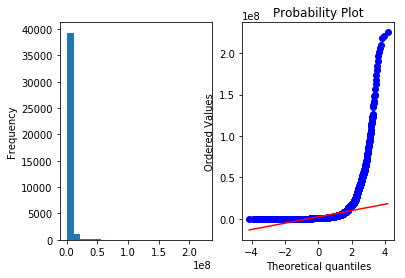

In [5]:
def hist_and_qqplot(series): 
    plt.subplot(1, 2, 1)
    series.plot.hist(bins=20)
    plt.subplot(1, 2, 2)
    stats.probplot(series, dist="norm", plot=pylab)
    
hist_and_qqplot(df['views'])

likes属性不符合正态分布。


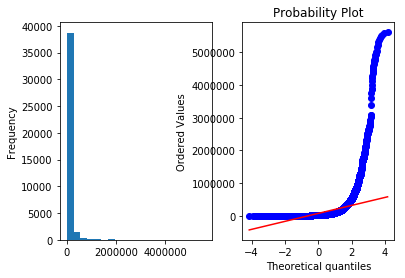

In [6]:
hist_and_qqplot(df['likes'])

dislikes属性不符合正态分布。

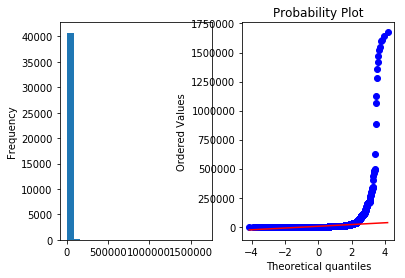

In [7]:
hist_and_qqplot(df['dislikes'])

comment_count属性不符合正态分布。

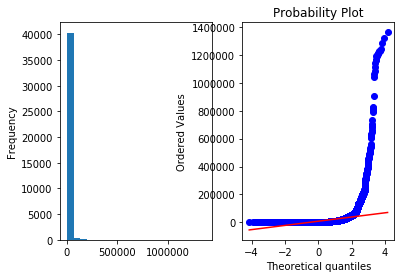

In [8]:
hist_and_qqplot(df['comment_count'])

trending_date_timestamp属性不符合正态分布。

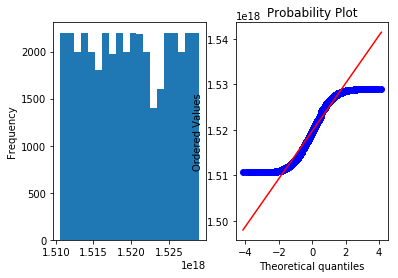

In [9]:
hist_and_qqplot(df['trending_date_timestamp'])

publish_time_timestamp属性不符合正态分布。

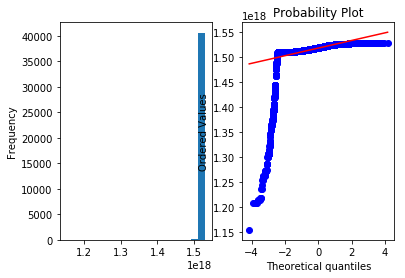

In [10]:
hist_and_qqplot(df['publish_time_timestamp'])

- 针对数值属性: 绘制盒图，对离群值进行识别

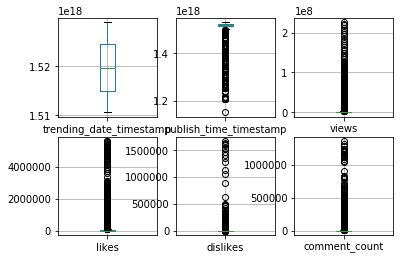

In [11]:
fields = ['trending_date_timestamp', 'publish_time_timestamp', 'views', 'likes', 'dislikes', 'comment_count']
for i, field in enumerate(fields):
    plt.subplot(2, 3, i+1)
    df.boxplot(field)


## 2. 数据缺失的处理

In [12]:
total = len(df)
data = {'counts': {}, 'percent': {}}
for field in df.columns:
    data['counts'][field] = total - df[field].count()
    data['percent'][field] = (total - df[field].count())/total
pd.DataFrame(data)

,counts,percent
category_id,0,0.00000
channel_title,0,0.00000
comment_count,0,0.00000
comments_disabled,0,0.00000
description,570,0.01392
dislikes,0,0.00000
likes,0,0.00000
publish_time,0,0.00000
publish_time_timestamp,0,0.00000
ratings_disabled,0,0.00000


### 2.1 缺失数据原因分析

观察数据集中缺失数据，分析其缺失的原因。

description: 视频介绍缺失了570条，占0.01。视频介绍为空，正常现象。

不需要处理缺失值。
